In [1]:
library(tidyverse)
library(zoo)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


ERROR: Error in library(zoo): there is no package called 'zoo'


In [2]:
mydatasets = file.path("C:","Users","markc","Desktop","DataVisuals","datasets")

In [3]:
dfsource <- file.path(mydatasets, "IRCountyPop.csv")
Pop<- read.csv(dfsource, stringsAsFactors = F)

In [ ]:
head(Pop)

In [ ]:
str(Pop)

In [4]:
# Assuming Pop is your data frame
names(Pop) <- gsub('^pop', '', names(Pop), ignore.case = TRUE)

# Trim leading and trailing spaces from column names
names(Pop) <- trimws(names(Pop))

# Display the updated column names
print(names(Pop))


 [1] "county" "1841"   "1851"   "1861"   "1871"   "1881"   "1891"   "1901"  
 [9] "1911"   "1926"   "1936"   "1951"   "1961"   "1971"   "1981"   "1991"  
[17] "2001"  


In [ ]:
head(Pop)

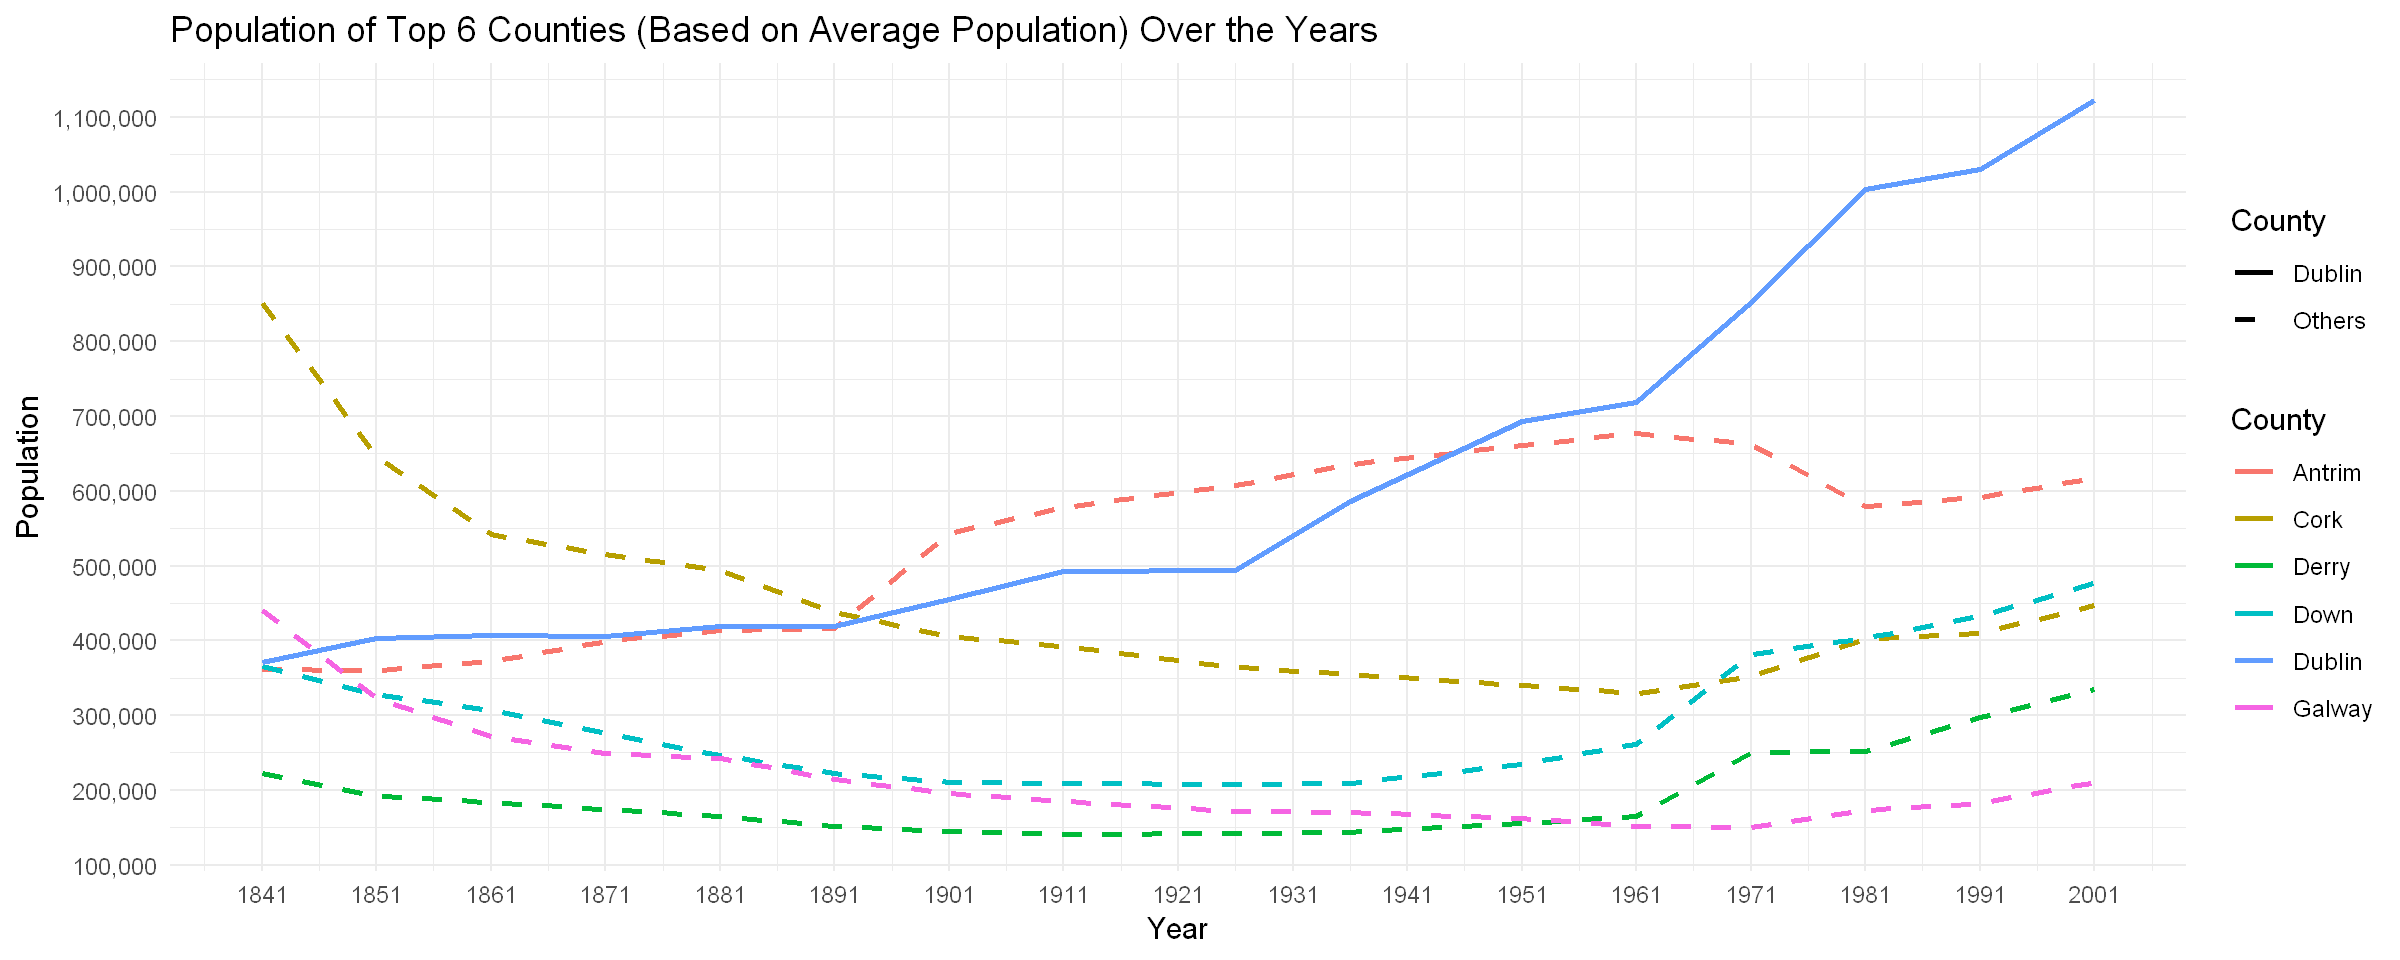

In [20]:
library(ggplot2)
library(dplyr)
library(tidyr)

# Assuming Pop is your data frame
# Convert the data to long format for ggplot2
long_data <- gather(data = Pop, key = "Year", value = "Population", -county)

# Convert 'Year' and 'Population' to numeric
long_data$Year <- as.numeric(long_data$Year)
long_data$Population <- as.numeric(long_data$Population)

# Calculate the average population for each county
avg_population <- long_data %>%
  group_by(county) %>%
  summarize(AvgPopulation = mean(Population, na.rm = TRUE)) %>%
  arrange(desc(AvgPopulation))  # Arrange in descending order

# Select the top 6 counties based on average population
top_6_counties <- head(avg_population$county, 6)

# Filter the data to include only the top 6 counties
filtered_data <- long_data %>%
  filter(county %in% top_6_counties)

# Plotting using ggplot2 with manual y-axis label formatting
options(repr.plot.width=20, repr.plot.height=8)  # Adjust the size of the plot within the Jupyter notebook
ggplot(filtered_data, aes(x = Year, y = Population, color = county, group = county), ) +
  geom_line(aes(linetype = ifelse(county == "Dublin", "Dublin", "Others")), size = 1.5) +  # Increase line size
  labs(title = "Population of Top 6 Counties (Based on Average Population) Over the Years",
       x = "Year",
       y = "Population",
       color = "County",
       linetype = "County") +
  scale_y_continuous(labels = scales::comma_format(), breaks = seq(0, max(filtered_data$Population), by = 100000)) +  # Adjust y-axis intervals
  scale_x_continuous(breaks = seq(min(filtered_data$Year), max(filtered_data$Year), by = 10)) +  # Adjust x-axis intervals
  scale_linetype_manual(values = c("Dublin" = "solid", "Others" = "dashed")) +
  theme_minimal(base_size = 18) +  # Increase text size
  theme(legend.key.size = unit(1, "cm"))  # Adjust the size of the legend key


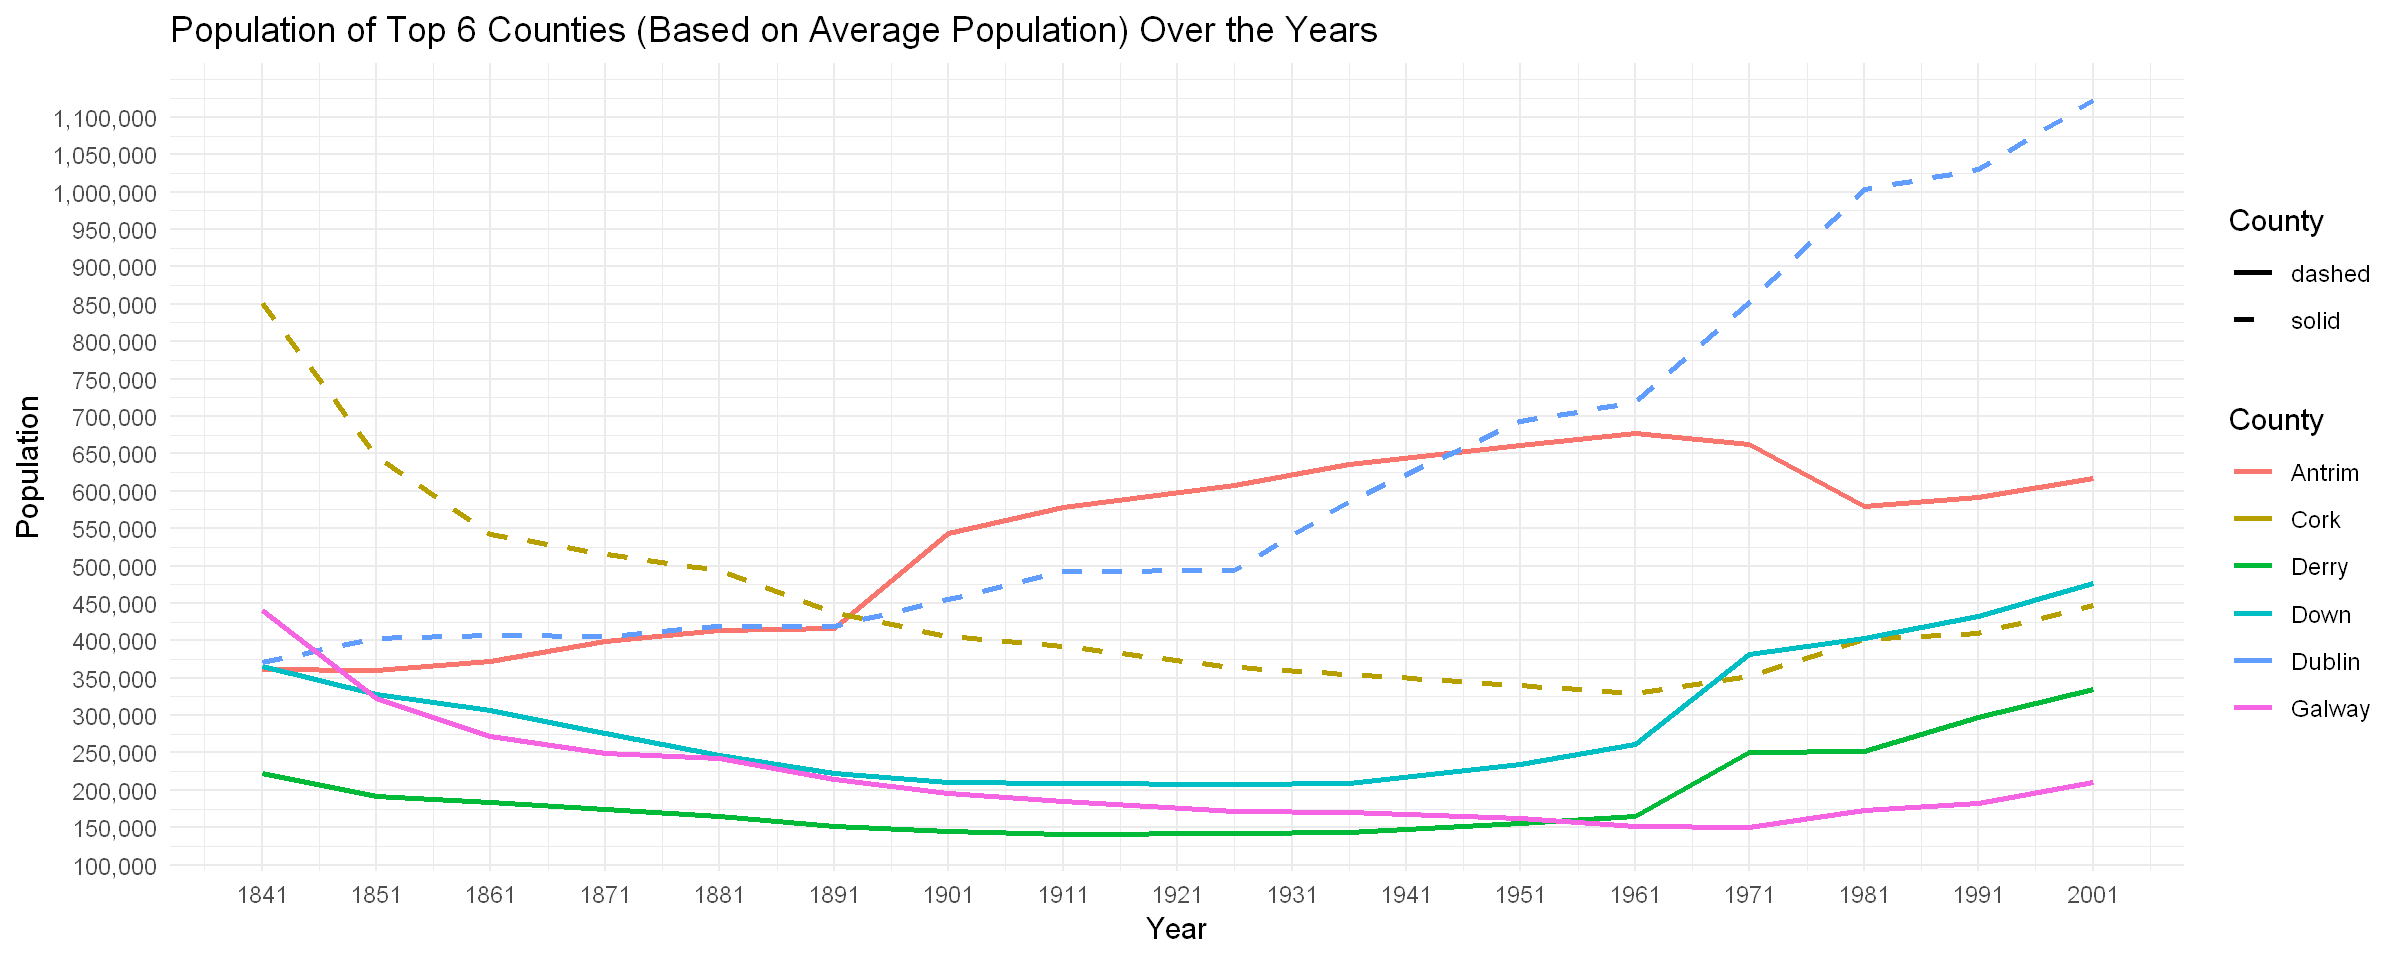

In [19]:
library(ggplot2)
library(dplyr)
library(tidyr)

# Assuming Pop is your data frame
# Convert the data to long format for ggplot2
long_data <- gather(data = Pop, key = "Year", value = "Population", -county)

# Convert 'Year' and 'Population' to numeric
long_data$Year <- as.numeric(long_data$Year)
long_data$Population <- as.numeric(long_data$Population)

# Calculate the average population for each county
avg_population <- long_data %>%
  group_by(county) %>%
  summarize(AvgPopulation = mean(Population, na.rm = TRUE)) %>%
  arrange(desc(AvgPopulation))  # Arrange in descending order

# Select the top 6 counties based on average population
top_6_counties <- head(avg_population$county, 6)

# Filter the data to include only the top 6 counties
filtered_data <- long_data %>%
  filter(county %in% top_6_counties)

# Plotting using ggplot2 with manual y-axis label formatting
options(repr.plot.width=20, repr.plot.height=8)  # Adjust the size of the plot within the Jupyter notebook
ggplot(filtered_data, aes(x = Year, y = Population, color = county, group = county)) +
  geom_line(aes(linetype = ifelse(county %in% c("Dublin", "Cork"), "solid", "dashed")), size = 1.5) +  # Increase line size
  labs(title = "Population of Top 6 Counties (Based on Average Population) Over the Years",
       x = "Year",
       y = "Population",
       color = "County",
       linetype = "County") +
  scale_y_continuous(labels = scales::comma_format(), breaks = seq(0, max(filtered_data$Population), by = 50000)) +  # Adjust y-axis intervals
  scale_x_continuous(breaks = seq(min(filtered_data$Year), max(filtered_data$Year), by = 10)) +  # Adjust x-axis intervals
  scale_linetype_manual(values = c("solid", "dashed")) +  # Set manual linetype values
  theme_minimal(base_size = 18) +  # Increase text size
  theme(legend.key.size = unit(1, "cm"))  # Adjust the size of the legend key
